# Assignment: Trees
Do three questions.

**Q1.** Please answer the following questions in your own words.

1. How are trees constructed?
   Trees are constructed as chains of probabilities as decisions are made between two outcomes with the intent to find the binary decisions that provide the largest splits in the data. 

2. How do trees handle non-linear relationships between variables? Compare this to linear models. 
   Trees split the data based on certain questions, and therefore are able to handle non-linear relationships well due to the process not involving linearity. Linear models struggle with non-linear data and will show low correlation, as they are built to assume a linear relationship. 

3. Why is the Gini a good loss function for categorical target variables? 
The gini impurity works by calculating the accuracy of the split. This allows for the data to be tested on how the tree sorts for a particular categorical variable 
4. Why do trees tend to overfit, and how can this tendency be constrained? 
Trees tend to overfit by including a large number of branches to accurately sort all of the data into either category. This can be contrained by limiting the number of decisions made in the tree to take the decisions that have the most impactful splits/separate the most data. 
5. True or false, and explain: Trees only really perform well in situations with lots of categorical variables as features/covariates. 
False. Trees can perform well with continuous variables, using a condition that separates data based upon having a value of that variable that lies on one side of a set value to split the data set. It could be that the mileage of a car is >= 50000 or < 50000, and that will split the data based on the values preset. 

6. Why don't most versions of classification/regression tree concept allow for more than two branches after a split?
Making two branches in a split is much easier to complete and more computationally efficient, and it is the best solution for categorical variables that can be decided on by true or false. 
7. What are some heuristic ways you can examine a tree and decide whether it is probably over- or under-fitting?
   If the tree has an excessive amount of decisions made, it is likely overfitting. Additionally, decisions with a small amount of data can also suggest that the tree has too many questions to the point that not much data is being categorized by some of them. 

**Q2.** This is a case study on regression and classification trees.

1. Load `./data/cars_hw.csv`. How many observations and features/covariates/variables? What are the available variables? Take a look at the first few rows of data.

2. For the categorical variables `Make`, `Color`, `Body_type`, `No_of_Owners`, `Fuel_Type`, `Transmission`, and `Transmission_Type`, create dummy/one-hot-encoded representations. For numeric variables, we'll use `Mileage_Run`, `Make_Year`, and `Seating_Capacity`. Our target variable will be `Price`. Make a train-test split of your data.

3. From `sklearn.tree`, import the `DecisionTreeRegressor` and `plot_tree`. Use a train-test split to iterate over possible values for `min_samples_leaf`, computing the $R^2$ for each value between 1 and 25. What choice achieves the highest $R^2$ on the test data?

4. For the optimal `min_samples_leaf` from 3, regress price on the rest of the features/covariates using the training data. What is your $R^2$ and RMSE on the test set? Plot the dendrogram. Plot the residuals. Is the density of residuals symmetric and centered around 0?

4. Run a linear regression of price on the same variables. Which model -- regression tree or linear regression -- performs better on the test set? Why?

5. Predict prices using both your tree and your linear model, and make a scatter plot of their values. Describe what you see. 

In [15]:
# 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./data/cars_hw.csv')

In [16]:
df.describe()

,Unnamed: 0,Make_Year,Mileage_Run,Seating_Capacity,Price
count,976.000000,976.000000,976.000000,976.000000,9.760000e+02
mean,488.500000,2016.963115,41571.195697,5.095287,7.410195e+05
std,281.891232,2.818742,24390.995134,0.446224,3.673234e+05
min,1.000000,2011.000000,1117.000000,4.000000,1.880000e+05
25%,244.750000,2015.000000,22676.750000,5.000000,4.757500e+05
50%,488.500000,2017.000000,37570.500000,5.000000,6.665000e+05
75%,732.250000,2019.000000,57421.250000,5.000000,8.830000e+05
max,976.000000,2022.000000,99495.000000,8.000000,2.941000e+06


In [17]:
df.head(10)

,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000
5,6,Hyundai,2016,red,hatchback,52261,1st,5,petrol,5-Speed,Manual,604000
6,7,Honda,2012,grey,hatchback,28108,2nd,5,petrol,5-Speed,Manual,316000
7,8,Tata,2019,grey,suv,92603,1st,5,diesel,6-Speed,Automatic,1419000
8,9,Hyundai,2021,blue,hatchback,16304,1st,5,petrol,5-Speed,Manual,710000
9,10,Renault,2019,bronze,hatchback,26350,2nd,5,petrol,5-Speed,Manual,392000


There are 976 observations in the data, and 11 variables(excluding the index) with four of them being numerical. 

In [18]:
# 2

df = pd.get_dummies(df, columns=['Make', 'Color', 'Body_Type', 'Fuel_Type', 'Transmission', 'Transmission_Type', 'No_of_Owners'])

df.head(10)


,Unnamed: 0,Make_Year,Mileage_Run,Seating_Capacity,Price,Make_Chevrolet,Make_Datsun,Make_Ford,Make_Honda,Make_Hyundai,...,Transmission_4-Speed,Transmission_5-Speed,Transmission_6-Speed,Transmission_7-Speed,Transmission_CVT,Transmission_Type_Automatic,Transmission_Type_Manual,No_of_Owners_1st,No_of_Owners_2nd,No_of_Owners_3rd
0,1,2017,44611,5,657000,False,False,False,False,False,...,False,False,False,True,False,True,False,True,False,False
1,2,2016,20305,5,682000,False,False,False,False,True,...,False,True,False,False,False,False,True,True,False,False
2,3,2019,29540,5,793000,False,False,False,True,False,...,False,True,False,False,False,False,True,False,True,False
3,4,2017,35680,5,414000,False,False,False,False,False,...,False,True,False,False,False,False,True,True,False,False
4,5,2017,25126,5,515000,False,False,False,False,True,...,False,True,False,False,False,False,True,True,False,False
5,6,2016,52261,5,604000,False,False,False,False,True,...,False,True,False,False,False,False,True,True,False,False
6,7,2012,28108,5,316000,False,False,False,True,False,...,False,True,False,False,False,False,True,False,True,False
7,8,2019,92603,5,1419000,False,False,False,False,False,...,False,False,True,False,False,True,False,True,False,False
8,9,2021,16304,5,710000,False,False,False,False,True,...,False,True,False,False,False,False,True,True,False,False
9,10,2019,26350,5,392000,False,False,False,False,False,...,False,True,False,False,False,False,True,False,True,False


In [19]:
x = df.drop(['Price', 'Unnamed: 0'], axis = 1)
y = df['Price']

In [20]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [28]:
# 3
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score

results = {}
for min_samples in range(1, 26):
    model = DecisionTreeRegressor(min_samples_leaf=min_samples, random_state=42)
    model.fit(x_train, y_train)
    y_test_pred = model.predict(x_test)
    test_r2 = r2_score(y_test, y_test_pred)
    results[min_samples] = test_r2

print(results)


{1: 0.825694442149029, 2: 0.7961254655848573, 3: 0.8201274539490717, 4: 0.8324688869233076, 5: 0.8183147328107339, 6: 0.8136440399023455, 7: 0.827906585033246, 8: 0.8301239804803289, 9: 0.8246783797029424, 10: 0.8231222690319528, 11: 0.8200582102929298, 12: 0.8112684322614446, 13: 0.8023259374026156, 14: 0.7940515332392335, 15: 0.7798756898552437, 16: 0.7796999698041571, 17: 0.7840948195996508, 18: 0.7805943502302589, 19: 0.7809762235310377, 20: 0.7869091131845111, 21: 0.7898001787727554, 22: 0.7913493615215442, 23: 0.7919802022195468, 24: 0.7937172253209709, 25: 0.7856905757567885}


It appears that 4 has the highest r2 value of all of the iterations.

In [29]:
# 4
tree = DecisionTreeRegressor(min_samples_leaf = 4)
tree.fit(x_train, y_train)

DecisionTreeRegressor(min_samples_leaf=4)

Test R^2: 0.7856905757567885
Test RMSE: 172422.52082580543


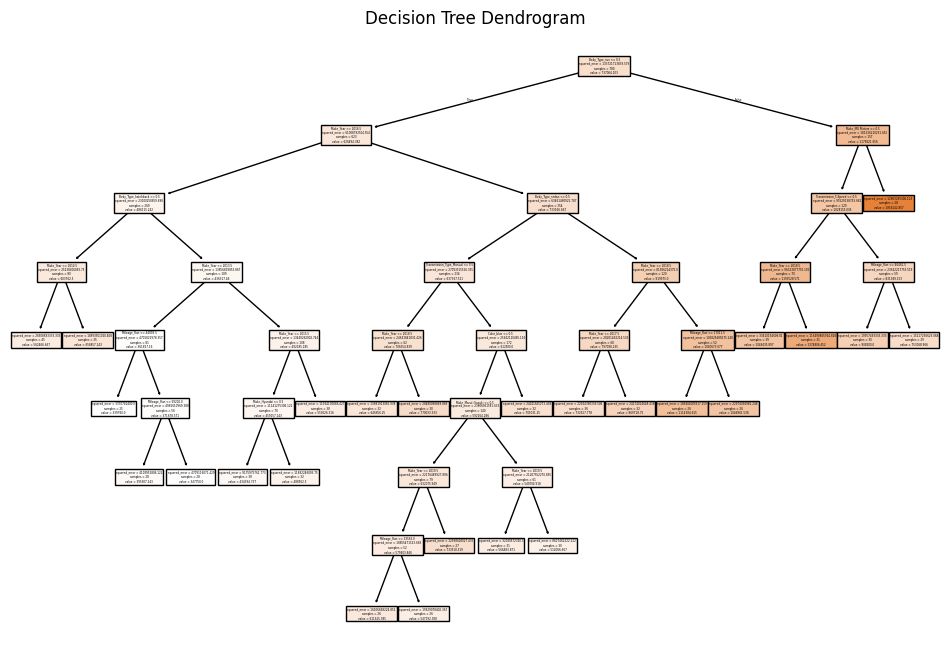

In [38]:
import matplotlib.pyplot as plt
y_test_pred = model.predict(x_test)
y_train_pred = model.predict(x_train)

test_r2 = r2_score(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print("Test R^2:", test_r2)
print("Test RMSE:", test_rmse)


plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=x.columns, filled=True)
plt.title("Decision Tree Dendrogram")
plt.show()


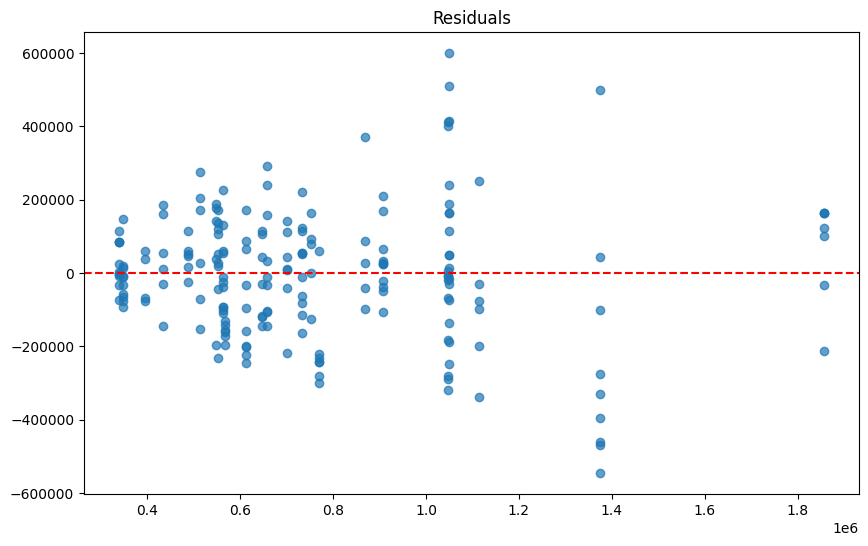

In [36]:
residuals = y_test - y_test_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_test_pred, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals")
plt.show()


The density of the residuals appears to be mostly symmetric and centered around zero, but there is a series of residuals that are skewed negative. 

In [37]:
from sklearn.linear_model import LinearRegression

compreg = LinearRegression(fit_intercept= True).fit(x, y)

y_hat = compreg.predict(x_test)
print(compreg.score(x_test, y_test))
print(compreg.intercept_) # Intercept value
print(compreg.coef_) # Regression coefficients

0.8388287457174142
-85416078.59307231
[ 4.24453068e+04 -4.93285062e-01  1.23242432e+05 -2.55264863e+05
 -2.48545512e+05 -1.94347025e+05 -3.06184749e+04 -4.78207046e+04
  2.75147577e+05  3.71212711e+05  6.24820828e+05 -2.23347049e+05
 -9.40147032e+04 -1.40806072e+05 -2.32497025e+05  2.59634552e+05
  3.31608584e+04  8.96310418e+03 -1.05678203e+05 -1.35277510e+05
  7.64705362e+04  2.23138000e+04 -4.09303605e+04  2.84972847e+04
  2.88801524e+04  1.37353318e+05 -1.24568292e+04  1.57811077e+04
  2.02293859e+04 -1.13267333e+05  9.81655063e+03 -8.87960098e+03
  8.95510364e+03 -3.74856060e+04 -1.97385553e+03 -9.39670794e+04
 -1.94810648e+05  9.41673197e+04  1.96584263e+05  1.21363958e+05
 -2.16293229e+04 -9.97346355e+04 -1.33796060e+05 -9.39698118e+04
  2.14706453e+04  2.39296984e+05 -3.30017571e+04  2.01783768e+04
 -2.01783768e+04  5.47019550e+04  2.59825390e+04 -8.06844940e+04]


The Linear Model had a higher R^2 for this data, and I believe this to be because the data showed a relatively strong linearity with all variables included. Linear regression is built for dealing with good linear correlations, so it fits this data better than a tree.

**Q3.** This is a case study about classification and regression trees.

1. Load the `Breast Cancer METABRIC.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  We'll use a consistent set of feature/explanatory variables. For numeric variables, we'll include `Tumor Size`, `Lymph nodes examined positive`, `Age at Diagnosis`. For categorical variables, we'll include `Tumor Stage`, `Chemotherapy`, and `Cancer Type Detailed`. One-hot-encode the categorical variables and concatenate them with the numeric variables into a feature/covariate matrix, $X$.

3. Let's predict `Overall Survival Status` given the features/covariates $X$. There are 528 missing values, unfortunately: Either drop those rows from your data or add them as a category to predict. Constrain the minimum samples per leaf to 10. Print a dendrogram of the tree. Print a confusion matrix of the algorithm's performance. What is the accuracy? 

4. For your model in part three, compute three statistics:
    - The **true positive rate** or **sensitivity**:
        $$
        TPR = \dfrac{TP}{TP+FN}
        $$
    - The **true negative rate** or **specificity**:
        $$
        TNR = \dfrac{TN}{TN+FP}
        $$
    Does your model tend to perform better with respect to one of these metrics?

5. Let's predict `Overall Survival (Months)` given the features/covariates $X$. Use the train/test split to pick the optimal `min_samples_leaf` value that gives the highest $R^2$ on the test set (it's about 110). What is the $R^2$? Plot the test values against the predicted values. How do you feel about this model for clinical purposes?

**Q4.** This is a case study about trees using bond rating data. This is a dataset about bond ratings for different companies, alongside a bunch of business statistics and other data. Companies often have multiple reviews at different dates. We want to predict the bond rating (AAA, AA, A, BBB, BB, B, ..., C, D). Do business fundamentals predict the company's rating?

1. Load the `./data/corporate_ratings.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  Plot a histogram of the `ratings` variable. It turns out that the gradations of AAA/AA/A and BBB/BB/B and so on make it hard to get good results with trees. Collapse all AAA/AA/A ratings into just A, and similarly for B and C.

3. Use all of the variables **except** Rating, Date, Name, Symbol, and Rating Agency Name. To include Sector, make a dummy/one-hot-encoded representation and include it in your features/covariates. Collect the relevant variables into a data matrix $X$. 

4. Do a train/test split of the data and use a decision tree classifier to predict the bond rating. Including a min_samples_leaf constraint can raise the accuracy and speed up computation time. Print a confusion matrix and the accuracy of your model. How well do you predict the different bond ratings?

5. If you include the rating agency as a feature/covariate/predictor variable, do the results change? How do you interpret this?

In [120]:
# 1
cd = pd.read_csv('./data/corporate_ratings.csv')
cd.head(10)

,Rating,Name,Symbol,Rating Agency Name,Date,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,...,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
0,A,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,11/27/2015,Consumer Durables,0.945894,0.426395,0.099690,44.203245,...,0.202716,0.437551,6.810673,9.809403,4.008012,0.049351,7.057088,15.565438,0.058638,3.906655
1,BBB,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,2/13/2014,Consumer Durables,1.033559,0.498234,0.203120,38.991156,...,0.074155,0.541997,8.625473,17.402270,3.156783,0.048857,6.460618,15.914250,0.067239,4.002846
2,BBB,Whirlpool Corporation,WHR,Fitch Ratings,3/6/2015,Consumer Durables,0.963703,0.451505,0.122099,50.841385,...,0.214529,0.513185,9.693487,13.103448,4.094575,0.044334,10.491970,18.888889,0.074426,3.483510
3,BBB,Whirlpool Corporation,WHR,Fitch Ratings,6/15/2012,Consumer Durables,1.019851,0.510402,0.176116,41.161738,...,1.816667,-0.147170,-1.015625,14.440104,3.630950,-0.012858,4.080741,6.901042,0.028394,4.581150
4,BBB,Whirlpool Corporation,WHR,Standard & Poor's Ratings Services,10/24/2016,Consumer Durables,0.957844,0.495432,0.141608,47.761126,...,0.166966,0.451372,7.135348,14.257556,4.012780,0.053770,8.293505,15.808147,0.058065,3.857790
5,AA,Schlumberger N.V.,SLB,Egan-Jones Ratings Company,7/18/2014,Energy,1.741958,1.317156,0.220796,83.931968,...,0.252389,0.644841,5.574517,5.792278,1.767609,0.157246,9.833295,8.644788,0.230445,4.044776
6,AA,Schlumberger N.V.,SLB,Egan-Jones Ratings Company,5/13/2014,Energy,1.939002,1.468909,0.256710,92.705452,...,0.270057,0.597160,4.417989,6.326531,1.700068,0.151173,12.140376,7.398337,0.216233,3.998076
7,A,Schlumberger N.V.,SLB,Egan-Jones Ratings Company,7/23/2015,Energy,1.905814,1.544791,0.197791,90.336857,...,0.258938,0.726292,5.047356,10.287293,1.908484,0.081212,15.264562,6.949487,0.248203,3.665200
8,AA,Honeywell International Inc.,HON,Egan-Jones Ratings Company,4/29/2014,Capital Goods,1.492419,1.129822,0.452859,74.102804,...,0.267923,0.781546,4.308240,10.291200,2.601191,0.138574,10.897998,5.512462,0.110997,5.482026
9,A,Honeywell International Inc.,HON,Moody's Investors Service,2/16/2016,Capital Goods,1.091557,0.850961,0.296935,76.394469,...,0.264045,0.803264,5.618107,9.692229,2.697369,0.170706,10.362903,6.994101,0.141365,4.793369


In [121]:
print(cd.shape)

(2029, 31)


There are 2029 observations in this data set, with 31 columns.

<Axes: xlabel='Rating', ylabel='Count'>

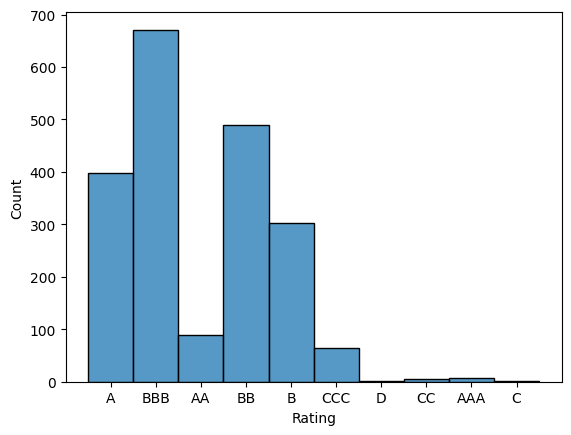

In [122]:
# 2
import seaborn as sns
sns.histplot(cd['Rating'])

In [123]:
cd['Rating'] = cd['Rating'].replace({'AA':'A', 'AAA':'A', 'BB':'B', 'BBB':'B', 'CC':'C', 'CCC':'C'})
cd.head(7)

,Rating,Name,Symbol,Rating Agency Name,Date,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,...,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
0,A,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,11/27/2015,Consumer Durables,0.945894,0.426395,0.099690,44.203245,...,0.202716,0.437551,6.810673,9.809403,4.008012,0.049351,7.057088,15.565438,0.058638,3.906655
1,B,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,2/13/2014,Consumer Durables,1.033559,0.498234,0.203120,38.991156,...,0.074155,0.541997,8.625473,17.402270,3.156783,0.048857,6.460618,15.914250,0.067239,4.002846
2,B,Whirlpool Corporation,WHR,Fitch Ratings,3/6/2015,Consumer Durables,0.963703,0.451505,0.122099,50.841385,...,0.214529,0.513185,9.693487,13.103448,4.094575,0.044334,10.491970,18.888889,0.074426,3.483510
3,B,Whirlpool Corporation,WHR,Fitch Ratings,6/15/2012,Consumer Durables,1.019851,0.510402,0.176116,41.161738,...,1.816667,-0.147170,-1.015625,14.440104,3.630950,-0.012858,4.080741,6.901042,0.028394,4.581150
4,B,Whirlpool Corporation,WHR,Standard & Poor's Ratings Services,10/24/2016,Consumer Durables,0.957844,0.495432,0.141608,47.761126,...,0.166966,0.451372,7.135348,14.257556,4.012780,0.053770,8.293505,15.808147,0.058065,3.857790
5,A,Schlumberger N.V.,SLB,Egan-Jones Ratings Company,7/18/2014,Energy,1.741958,1.317156,0.220796,83.931968,...,0.252389,0.644841,5.574517,5.792278,1.767609,0.157246,9.833295,8.644788,0.230445,4.044776
6,A,Schlumberger N.V.,SLB,Egan-Jones Ratings Company,5/13/2014,Energy,1.939002,1.468909,0.256710,92.705452,...,0.270057,0.597160,4.417989,6.326531,1.700068,0.151173,12.140376,7.398337,0.216233,3.998076


In [124]:
# 3
x1 = cd.drop(columns = ['Rating', 'Date', 'Name', 'Symbol', 'Rating Agency Name'])

In [125]:
x2 = pd.get_dummies(x1[['Sector']])

x = pd.concat([x1, x2], axis = 1)
x = x.drop(columns = ['Sector'])


x.head()


,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,pretaxProfitMargin,grossProfitMargin,operatingProfitMargin,returnOnAssets,returnOnCapitalEmployed,...,Sector_Consumer Durables,Sector_Consumer Non-Durables,Sector_Consumer Services,Sector_Energy,Sector_Finance,Sector_Health Care,Sector_Miscellaneous,Sector_Public Utilities,Sector_Technology,Sector_Transportation
0,0.945894,0.426395,0.099690,44.203245,0.037480,0.049351,0.176631,0.061510,0.041189,0.091514,...,True,False,False,False,False,False,False,False,False,False
1,1.033559,0.498234,0.203120,38.991156,0.044062,0.048857,0.175715,0.066546,0.053204,0.104800,...,True,False,False,False,False,False,False,False,False,False
2,0.963703,0.451505,0.122099,50.841385,0.032709,0.044334,0.170843,0.059783,0.032497,0.075955,...,True,False,False,False,False,False,False,False,False,False
3,1.019851,0.510402,0.176116,41.161738,0.020894,-0.012858,0.138059,0.042430,0.025690,-0.027015,...,True,False,False,False,False,False,False,False,False,False
4,0.957844,0.495432,0.141608,47.761126,0.042861,0.053770,0.177720,0.065354,0.046363,0.096945,...,True,False,False,False,False,False,False,False,False,False


In [129]:
y = cd['Rating']

In [130]:
xtrain2, xtest2, ytrain2, ytest2 = train_test_split(x, y, test_size = 0.2)

In [ ]:
xtrain2 = xtrain2.astype(float)
xtest2 = xtest2.astype(float)


currentRatio                          float64
quickRatio                            float64
cashRatio                             float64
daysOfSalesOutstanding                float64
netProfitMargin                       float64
pretaxProfitMargin                    float64
grossProfitMargin                     float64
operatingProfitMargin                 float64
returnOnAssets                        float64
returnOnCapitalEmployed               float64
returnOnEquity                        float64
assetTurnover                         float64
fixedAssetTurnover                    float64
debtEquityRatio                       float64
debtRatio                             float64
effectiveTaxRate                      float64
freeCashFlowOperatingCashFlowRatio    float64
freeCashFlowPerShare                  float64
cashPerShare                          float64
companyEquityMultiplier               float64
ebitPerRevenue                        float64
enterpriseValueMultiple           

In [151]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
encoder = LabelEncoder()
category_mapping = {'A': 0, 'B': 1, 'C': 2, 'D': 3}
ytrain2_encoded = ytrain2.map(category_mapping)
ytest2_encoded = ytest2.map(category_mapping)

print("Encoded values:", list(zip(ytrain2, ytrain2)))

Encoded values: [('A', 'A'), ('A', 'A'), ('C', 'C'), ('B', 'B'), ('B', 'B'), ('B', 'B'), ('B', 'B'), ('B', 'B'), ('B', 'B'), ('B', 'B'), ('A', 'A'), ('A', 'A'), ('B', 'B'), ('B', 'B'), ('A', 'A'), ('A', 'A'), ('A', 'A'), ('B', 'B'), ('B', 'B'), ('B', 'B'), ('B', 'B'), ('B', 'B'), ('A', 'A'), ('A', 'A'), ('B', 'B'), ('B', 'B'), ('B', 'B'), ('B', 'B'), ('B', 'B'), ('B', 'B'), ('A', 'A'), ('B', 'B'), ('B', 'B'), ('C', 'C'), ('B', 'B'), ('B', 'B'), ('B', 'B'), ('B', 'B'), ('B', 'B'), ('B', 'B'), ('B', 'B'), ('B', 'B'), ('B', 'B'), ('B', 'B'), ('B', 'B'), ('B', 'B'), ('B', 'B'), ('A', 'A'), ('B', 'B'), ('B', 'B'), ('B', 'B'), ('B', 'B'), ('A', 'A'), ('B', 'B'), ('B', 'B'), ('A', 'A'), ('B', 'B'), ('B', 'B'), ('B', 'B'), ('B', 'B'), ('B', 'B'), ('B', 'B'), ('B', 'B'), ('B', 'B'), ('B', 'B'), ('A', 'A'), ('B', 'B'), ('B', 'B'), ('B', 'B'), ('C', 'C'), ('A', 'A'), ('B', 'B'), ('B', 'B'), ('B', 'B'), ('B', 'B'), ('A', 'A'), ('B', 'B'), ('A', 'A'), ('B', 'B'), ('B', 'B'), ('B', 'B'), ('B', 'B'),

In [153]:
tree2 = DecisionTreeClassifier(min_samples_leaf=6)
tree2.fit(xtrain2, ytrain2_encoded)

DecisionTreeClassifier(min_samples_leaf=6)

In [163]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = tree2.predict(xtest2)
print(accuracy_score(ytest2_encoded, y_pred))
print(confusion_matrix(ytest2_encoded, y_pred))


0.6921182266009852
[[ 56  49   0]
 [ 51 222   6]
 [  1  18   3]]


In [166]:
# 5
x3 = cd.drop(columns = ['Rating', 'Date', 'Name', 'Symbol'])
x4 = pd.get_dummies(x3[['Sector', 'Rating Agency Name']])

x5 = pd.concat([x3, x4], axis = 1)
x5 = x5.drop(columns = ['Sector', 'Rating Agency Name'])
x5.head()

,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,pretaxProfitMargin,grossProfitMargin,operatingProfitMargin,returnOnAssets,returnOnCapitalEmployed,...,Sector_Health Care,Sector_Miscellaneous,Sector_Public Utilities,Sector_Technology,Sector_Transportation,Rating Agency Name_DBRS,Rating Agency Name_Egan-Jones Ratings Company,Rating Agency Name_Fitch Ratings,Rating Agency Name_Moody's Investors Service,Rating Agency Name_Standard & Poor's Ratings Services
0,0.945894,0.426395,0.099690,44.203245,0.037480,0.049351,0.176631,0.061510,0.041189,0.091514,...,False,False,False,False,False,False,True,False,False,False
1,1.033559,0.498234,0.203120,38.991156,0.044062,0.048857,0.175715,0.066546,0.053204,0.104800,...,False,False,False,False,False,False,True,False,False,False
2,0.963703,0.451505,0.122099,50.841385,0.032709,0.044334,0.170843,0.059783,0.032497,0.075955,...,False,False,False,False,False,False,False,True,False,False
3,1.019851,0.510402,0.176116,41.161738,0.020894,-0.012858,0.138059,0.042430,0.025690,-0.027015,...,False,False,False,False,False,False,False,True,False,False
4,0.957844,0.495432,0.141608,47.761126,0.042861,0.053770,0.177720,0.065354,0.046363,0.096945,...,False,False,False,False,False,False,False,False,False,True


In [167]:
xtrain3, xtest3, ytrain3, ytest3 = train_test_split(x5, y, test_size = 0.2)

In [168]:
xtrain3 = xtrain3.astype(float)
xtest3 = xtest3.astype(float)

In [170]:
encoder = LabelEncoder()
category_mapping = {'A': 0, 'B': 1, 'C': 2, 'D': 3}
ytrain3_encoded = ytrain3.map(category_mapping)
ytest3_encoded = ytest3.map(category_mapping)

In [175]:
tree3 = DecisionTreeClassifier(min_samples_leaf=6)
tree3.fit(xtrain3, ytrain3_encoded)

y_pred2 = tree3.predict(xtest3)
print(accuracy_score(ytest3_encoded, y_pred2))
print(confusion_matrix(ytest3_encoded, y_pred2))

0.7413793103448276
[[ 66  36   1]
 [ 52 233   7]
 [  0   9   2]]


The accuracy is improved when the model includes the agency for which the review is provided. This implies that the review agency has a notable effect on the ratings provided in reviews. 

**Q5.** This is a case study about detecting fraud using classification trees. The goal is to predict the `class` variable, which is 0 for non-fraud and 1 for fraud.

1. Open `./data/creditcard_fraud.csv`. Print the number of observations and variables, and look at the first few rows of data. The variables are already normalized and de-identified, and are just called things like `V8` to protect the privacy of the clients.

2. Print a table of counts for the `class` variable and make a histogram. What percentage of transactions are fraudulent?

3. Drop `Time` and make a decision tree classifier to predict fraud. Print a confusion table and compute the accuracy. This is a serious **class imbalance** problem: The minority class is so small that essentially predicting 0's for all cases will achieve an extremely high accuracy. There are over-sampling techniques to deal with this issue, but we don't have time to cover them in class.

4. Imagine that you block every transaction in the test set labelled as fraudulent. How much money is (1) saved that should be saved, (2) lost to fraud anyway, (3) withheld in error from customers? Does implementing this anti-fraud system seem like a good idea, or not? Why?

5. Instead of predicting fraud, predict loss: Multiple the `Class` variable times the `Amount` variable, and call it `Loss`. Predict it using a decision tree regressor (making sure to drop Class, Time, and Loss from the features/covariates/predictors). What $R^2$ and RMSE do you get? Make a scatterplot of the predicted values on the test group versus the actual test values. Do you notice any interesting patterns? How could you use this algorithm to decide which transactions to block, and why?


In [39]:
df2 = pd.read_csv('./data/creditcard_fraud.csv')

FileNotFoundError: [Errno 2] No such file or directory: './data/creditcard_fraud.csv'

**Q6.** Show that any decision tree is equivalent to a linear regression on a set of dummy variables that represent the optimal splits in the tree. 

Hint: You can think of CART as partitioning the feature space into a set of sets $\{S_1, S_2, ..., S_K\}$, and then predicting the average for all of the observations in each set $S_k$, $m_k$:
$$
\hat{y}(x) = \sum_{k=1}^K \mathbb{I}\{ x \text{ is in } S_k \} m_k
$$
where $\mathbb{I} \{ P(x,k)\}$ takes the value 1 if the proposition $P(x,k)$ is true and 0 otherwise. Now, doesn't that look like least-squares regression on a set of dummy/one-hot-encoded variables?

Conversely, can any linear regression be represented by a tree?